In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#seed set to last 2 digit of student no.
seed = int(29)
np.random.seed(seed)

In [3]:
#Using numpy sample 100 numbers from a uniform distribution and store it into variable x.
x = np.random.uniform(-5, 5, 100)

In [4]:
y = 12 * x - 4

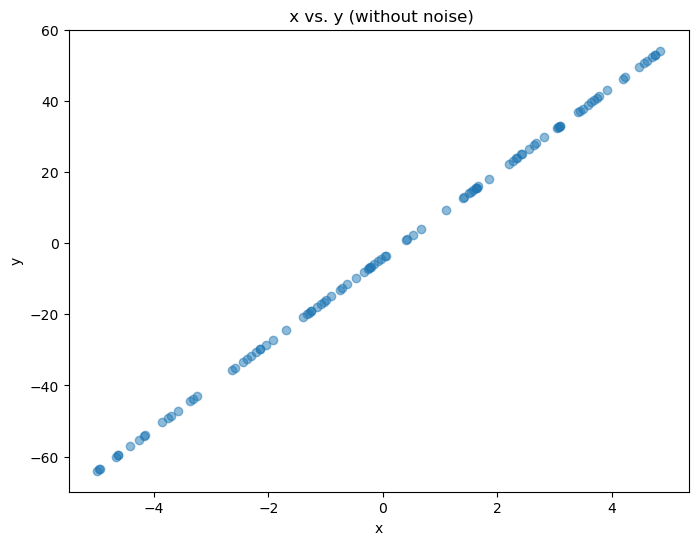

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title(" x vs. y (without noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
noise = np.random.normal(0,10,100)

In [7]:
y_noise  = y + noise

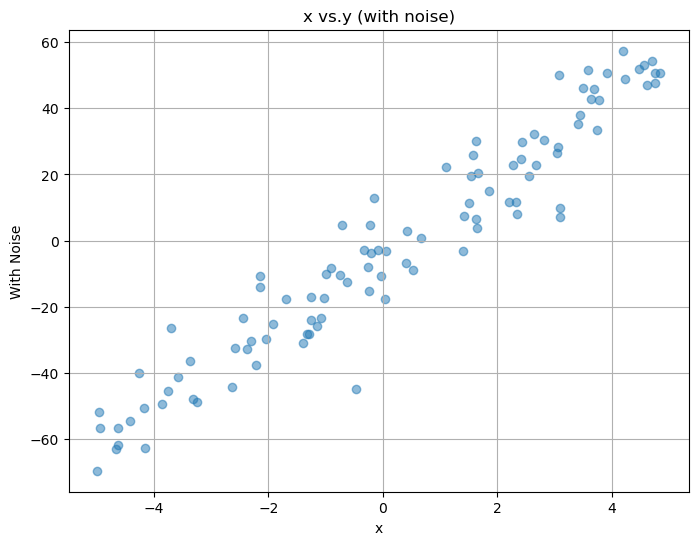

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y_noise, alpha=0.5)
plt.title("x vs.y (with noise)")
plt.xlabel("x")
plt.ylabel("With Noise")
plt.grid(True)

In [9]:
import pandas as pd;
import os;

2. Exercise # 2: commerce website predictions (80% )
Requirements:
a. Get the data :
i. Load the “Ecom Expense.csv” data into a data frame, name the dataframe ecom_exp_firstname , where firstname is your firstname.

In [10]:
filename = 'Ecom Expense.csv'
ecom_exp_achint  = pd.read_csv(filename, sep=',')

b. Initial Exploration:
i. Display (print) the first 3 records.

In [11]:
ecom_exp_achint.head(3)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455


ii. Display (print) the shape of the dataframe.

In [12]:
ecom_exp_achint.shape


(2362, 9)

iii. Display (print) the column names.

In [13]:
ecom_exp_achint.columns

Index(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype='object')

iv. Display (print) the types of columns.

In [14]:
print(ecom_exp_achint.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    2362 non-null   object 
 1   Age               2362 non-null   int64  
 2    Items            2362 non-null   int64  
 3   Monthly Income    2362 non-null   int64  
 4   Transaction Time  2362 non-null   float64
 5   Record            2362 non-null   int64  
 6   Gender            2362 non-null   object 
 7   City Tier         2362 non-null   object 
 8   Total Spend       2362 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 166.2+ KB
None


v. Display (print) the missing values per column. (You will have to write code to illustrate the column name and the number of missing values per column. If there are no missing values print 0.

In [15]:
missing_values = ecom_exp_achint.isnull().sum()
print(missing_values)

Transaction ID      0
Age                 0
 Items              0
Monthly Income      0
Transaction Time    0
Record              0
Gender              0
City Tier           0
Total Spend         0
dtype: int64


c. Data transformation:

i. Using “Get dummies” transform all the categorical variables in your dataframe into numeric values.




In [16]:



gender_dummies = pd.get_dummies(ecom_exp_achint['Gender'], prefix='Gender')
tier_dummies = pd.get_dummies(ecom_exp_achint['City Tier'] , prefix='City Tier')




ii. Attach the newly created variables to your dataframe and drop the original columns.


In [17]:
ecom_exp_achint = pd.concat([ecom_exp_achint , gender_dummies , tier_dummies] , axis = 1)


ecom_exp_achint

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,False,True,False,True,False
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,False,True,False,True,False
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,True,False,False,False,True
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,True,False,True,False,False


iii. Remove the original categorical variables columns. Use pandas drop method and select the correct argument values. For more info checkout

In [18]:
ecom_exp_achint.drop(['Gender' , 'City Tier'] , axis=1 , inplace=True)



iv. In the same manner drop the Transaction ID column.

In [19]:
ecom_exp_achint.drop(['Transaction ID'] , axis=1, inplace=True)


ecom_exp_achint

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,42,10,7313,627.668127,5,4198.385084,True,False,True,False,False
1,24,8,17747,126.904567,3,4134.976648,True,False,False,True,False
2,47,11,22845,873.469701,2,5166.614455,False,True,False,True,False
3,50,11,18552,380.219428,7,7784.447676,True,False,True,False,False
4,60,2,14439,403.374223,2,3254.160485,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2357,50,7,5705,460.157207,3,2909.619546,False,True,False,True,False
2358,35,11,11202,851.924751,8,7968.633136,False,True,False,True,False
2359,27,5,21335,435.145358,8,8816.406448,True,False,False,False,True
2360,45,12,19294,658.439838,7,7915.595856,True,False,True,False,False


v. Write a function that accepts a dataframe as an argument and normalizes all the data points in the dataframe. Use pandas .min() and .max().

In [20]:
def normalize_dataframe(df):

     min_values = df.min()
     max_values = df.max()
     normalized_df = (df - min_values) / (max_values - min_values)

     return normalized_df


vi. Call the new function and pass as an argument your transformed dataframe. By now all your data is numeric ☺

In [21]:
ecom_exp_achint =ecom_exp_achint.astype(float)

In [22]:
ecom_exp_normalized = normalize_dataframe(ecom_exp_achint)

vii. Display (print) the first two records.

In [23]:
ecom_exp_normalized.head(2)

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,0.55,0.642857,0.189663,0.627058,0.5,0.241242,1.0,0.0,1.0,0.0,0.0
1,0.10,0.500000,0.562346,0.126412,0.3,0.236305,1.0,0.0,0.0,1.0,0.0


viii. Use pandas.hist to generate a plot showing all the variables histograms. Set the figure size to 9 inches by 10 inches.

<Figure size 900x1000 with 0 Axes>

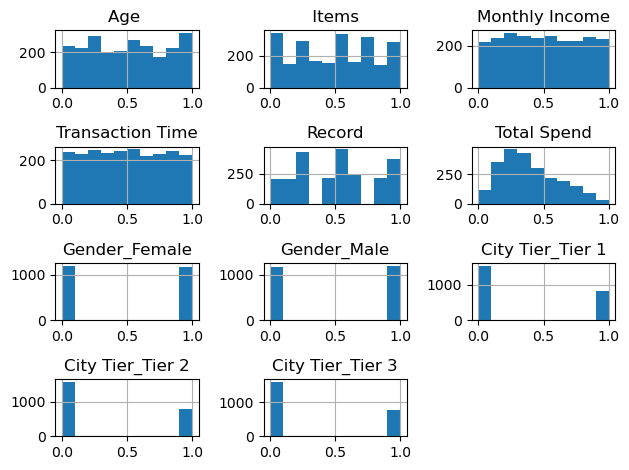

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 10))
ecom_exp_normalized.hist()
plt.tight_layout() 
plt.show()

ix. Use pandas.plotting.scattermatrix to generate a plot illustrating the relationships between : 'Age ','Monthly Income','Transaction Time','Total Spend'. Set alpha to 0.4, figure size to 13 inches by 15 inches

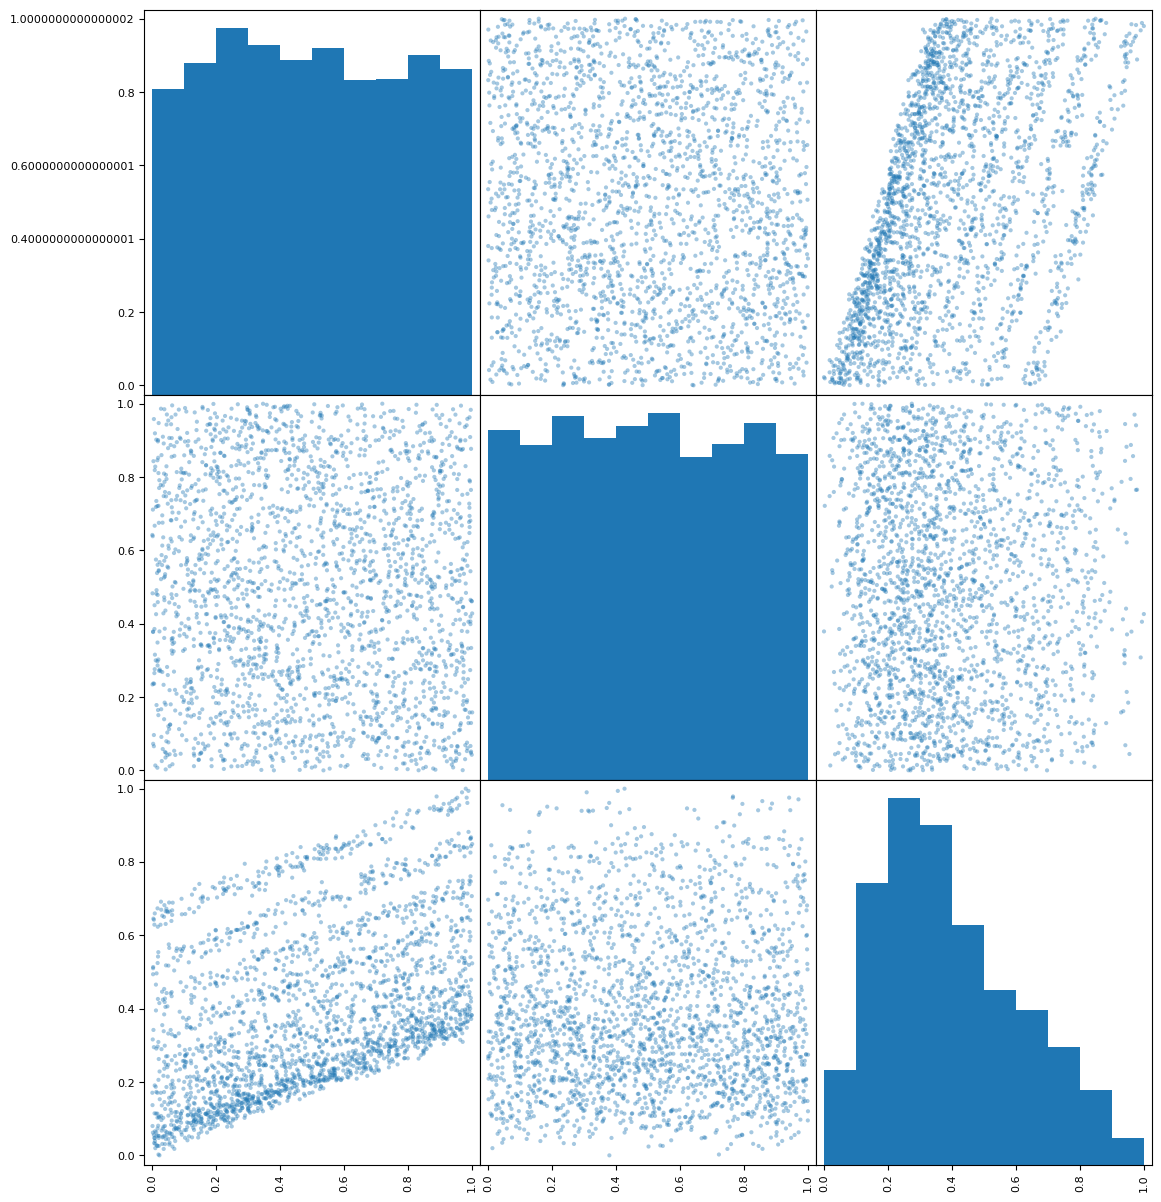

In [25]:

from pandas.plotting import scatter_matrix


import pandas.plotting as pd_plotting

# Select the columns for the scatter matrix
columns_to_plot = ['Monthly Income', 'Transaction Time', 'Total Spend']

# Create the scatter matrix
scatter_matrix = pd_plotting.scatter_matrix(ecom_exp_normalized[columns_to_plot], alpha=0.4, figsize=(13, 15))

# Set labels on the diagonal subplots
for ax in scatter_matrix.ravel():
    ax.set_xlabel('')
    ax.set_ylabel('')

# Show the plot
plt.show()


d. Build a model
i. Assume a linear relationship between the output variable (label or target) Total Spend and the predictor variables (features): Monthly Income, Transaction Time, and both sets of dummy variables you created earlier in point “c” above.

ii. Use “train test split” from sklearn to split your data into 65 % for training and 35% for testing.

iii. Set the seed to be the last two digits of your student number.
iv. Store the training data in a dataframe named as follows: 

x_train_firstname for the features (predictors) and the training labels y_train_firstname. Store the test data as follows: x_test_firstname and y_test_firstname.

In [26]:
from sklearn.model_selection import train_test_split

seed = 29

# Define the feature matrix (X) and target variable (y)
X = ecom_exp_normalized[['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City Tier_Tier 1', 'City Tier_Tier 2', 'City Tier_Tier 3']]
y = ecom_exp_normalized['Total Spend']

# Spliting  the data into training and testing sets (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=seed)

# Store the training and test data in dataframes using my first name
x_train_achint = X_train
y_train_achint = y_train
x_test_achint = X_test
y_test_achint = y_test


v. Using sklearn fit a linear regression model to the training data.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fitting  the model to the training data
model.fit(x_train_achint, y_train_achint)


LinearRegression()

vi. Display (print) the coefficients (i.e. the weights of the model).

In [28]:
#Displaying the coeffiecient of the model
print("Coefficients (Weights):")
for feature, coef in zip(x_train_achint.columns, model.coef_):
    print(f"{feature}: {coef}")

Coefficients (Weights):
Monthly Income: 0.33869734823085307
Transaction Time: 0.013170345077676539
Gender_Female: 7028319951629.092
Gender_Male: 7028319951629.09
City Tier_Tier 1: -17003406929390.084
City Tier_Tier 2: -17003406929390.08
City Tier_Tier 3: -17003406929390.117


vii. Display (print) the model score (i.e. the R2 of the model).

In [29]:


train_score = model.score(x_train_achint, y_train_achint)
print(f"R-squared (Training Data): {train_score:.2f}")


R-squared (Training Data): 0.20


viii. Repeat the steps from (i) but add the feature ‘Record’ to the list of predictors (features).

In [30]:
X_new = ecom_exp_normalized[['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City Tier_Tier 1', 'City Tier_Tier 2', 'City Tier_Tier 3' ,'Record']]



X_train_new, X_test_new , y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.35, random_state=seed)

x_train_achint_new = X_train_new
y_train_achint_new = y_train_new
x_test_achint_new = X_test_new
y_test_achint_new = y_test_new


model.fit(x_train_achint_new, y_train_achint_new)


LinearRegression()

ix. Display (print) the coefficients (i.e. the weight of the model).

In [31]:
print("Coefficients (Weights):")
for feature, coef in zip(x_train_achint_new.columns, model.coef_):
    print(f"{feature}: {coef}")

Coefficients (Weights):
Monthly Income: 0.3205767321973535
Transaction Time: 0.01616392963929869
Gender_Female: 862588322200.878
Gender_Male: 862588322200.8939
City Tier_Tier 1: -4004530238358.405
City Tier_Tier 2: -4004530238358.404
City Tier_Tier 3: -4004530238358.4253
Record: 0.5976991555338901


x. Display (print) the model score (i.e. the R2of the model).

In [32]:
train_score_new = model.score(x_train_achint_new, y_train_achint_new)
print(f"R-squared (Training Data): {train_score_new:.2f}")   

R-squared (Training Data): 0.92
